#### A possible brief description of the columns in the dataset:

- id: A unique identifier for each item.
- item_date: The date the item was offered/sold.
- quantity tons: The quantity of the item in tons.
- customer: The name of the customer to whom the item was offered/sold.
- country: The country where the customer is located.
- status: The status of the item, i.e., whether it was offered or sold.
- item type: The type of steel item.
- application: The application of the steel item.
- thickness: The thickness of the steel item in mm.
- width: The width of the steel item in mm.
- material_ref: A reference code for the material of the item.
- product_ref: A reference code for the product type of the item.
- delivery date: The date the item was/will be delivered.
- selling_price: The price at which the item was sold or offered. This is the target variable we want to predict using regression models.

In [1]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
#importing the dataset
data=pd.read_excel('C:/Users/Mohan/Desktop/Assignment/daily_offers.xlsx')
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


# Descriptive Statistics

In [3]:
# Size of dataset
data.shape

(181673, 14)

In [4]:
data.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
#statistical description
data.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [7]:
#no.of unique values
data.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [8]:
data.drop(['id'],axis=1,inplace=True)

In [9]:
data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [10]:
#datatypes of each column
data.dtypes

item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [11]:
data['quantity tons']=data['quantity tons'].astype(float)        #we try to change the dtype from object to int but error occur

ValueError: could not convert string to float: 'e'

In [12]:
data[data['quantity tons']=='e'].index   

Int64Index([173086], dtype='int64')

In [13]:
data.iloc[173085:173088,:]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
173085,20200714.0,102.881875,30161943.0,40.0,Not lost for AM,S,10.0,0.76,1220.0,NaN,628377,20201001.0,502.0
173086,20200714.0,e,30157111.0,78.0,Won,W,41.0,0.50,1000.0,NaN,164141591,20200801.0,672.0
173087,20200714.0,17.141398,30287258.0,27.0,Won,S,10.0,3.00,1238.0,NaN,1670798778,20200701.0,596.0


In [14]:
data.drop([173086],inplace=True) 

In [15]:
data['quantity tons']=data['quantity tons'].astype(float)      

In [16]:
#Checking categorical columns
categorical_columns = [col for col in data.columns if data.dtypes[col] == 'object']
print('Categorical Features are : ',categorical_columns)

Categorical Features are :  ['status', 'item type', 'material_ref']


In [17]:
#Checking the count of unique values in categorical features.
unique_categories_count_list = [{col:len(data[col].unique())} for col in categorical_columns]    
unique_categories_count_list

[{'status': 10}, {'item type': 7}, {'material_ref': 16564}]

In [18]:
#Checking those unique values
unique_categories_list = [{col:data[col].value_counts()} for col in categorical_columns]    
unique_categories_list     

[{'status': Won                116009
  Lost                34438
  Not lost for AM     19573
  Revised              4276
  To be approved       4170
  Draft                3140
  Offered                53
  Offerable              10
  Wonderful               1
  Name: status, dtype: int64},
 {'item type': W         105614
  S          69236
  PL          5660
  Others       610
  WI           524
  IPL           27
  SLAWR          1
  Name: item type, dtype: int64},
 {'material_ref': DX51D+Z                                     922
  G9010                                       856
  DC01 RED.FLAT KUCHNIA EKO 2.2               777
  DC01                                        725
  G9006                                       671
                                             ... 
  0000000000000000000000000000000003050080      1
  0000000000000000000000000000000004001568      1
  0000000000000000000000000000000003016460      1
  0000000000000000000000000000000003016459      1
  202006170

In [19]:
#Checking numerical  columns
numerical_columns = [col for col in data.columns if data.dtypes[col] != 'object']
print('Numerical Features are : ',numerical_columns)

Numerical Features are :  ['item_date', 'quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'delivery date', 'selling_price']


# Data Cleaning

### Missing value handling

In [20]:
#Check for number of null values
data.isna().sum()

item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77918
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [21]:
#dropping 'material_ref' since there's a large no.of missing values
data.drop(['material_ref'],axis=1,inplace=True)     

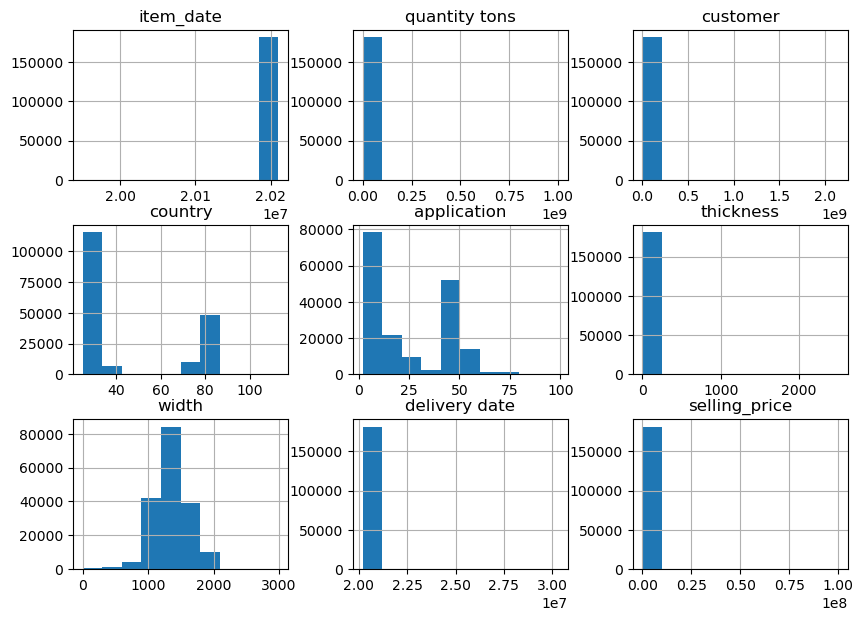

In [22]:
#plotting histogram
freq=data.select_dtypes(include=['float'])           # here mean is affected by extreme values thus we              
freq.hist(figsize=(10,7))                            # use median which is not affected by extreme values
plt.show()

- Only feature 'width' follows a normal distribution

In [23]:
#Check for number of null values
data.isna().sum()

item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [24]:
for i in freq:
    data[i]=data[i].fillna(data[i].median())
    print(i)

item_date
quantity tons
customer
country
application
thickness
width
delivery date
selling_price


In [25]:
data['status'].mode()

0    Won
Name: status, dtype: object

In [26]:
#filling missing values in col 'status' with mode since its categorical
data['status']=data['status'].fillna(data['status'].mode()[0])

In [27]:
#Check for number of null values
data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [28]:
data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


## Outlier Detection and handling

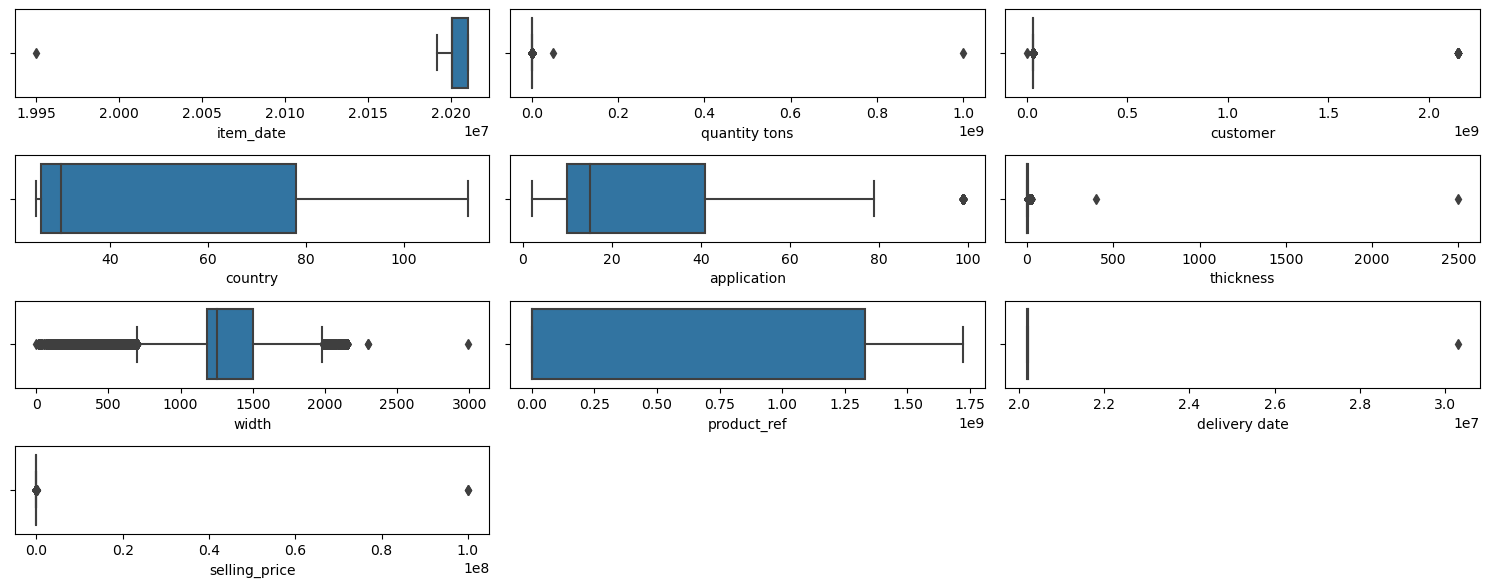

In [29]:
#Plotting boxplot for Outiler Detection
num_col= ['item_date', 'quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'delivery date', 'selling_price']
plt.figure(figsize=(15, 7))
for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data[num_col[i]],orient='v')
    plt.tight_layout()

Text(0.5, 1.0, 'Box plot of item_date column ')

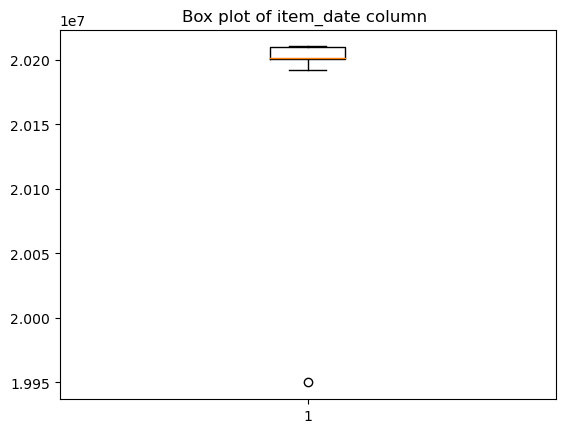

In [30]:
# item_date
plt.boxplot(data['item_date'])                             #outlier detection using boxplot
plt.title('Box plot of item_date column ')

In [31]:
Q1=np.percentile(data['item_date'],25,interpolation='midpoint')
Q2=np.percentile(data['item_date'],50,interpolation='midpoint')
Q3=np.percentile(data['item_date'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

20200929.0
20201130.0
20210203.0
20187018.0
20224114.0


In [32]:
outlier = []
for x in data['item_date']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
        
print(outlier)

[19950000.0]


In [33]:
print(data[data['item_date']<low_lim].index)

Int64Index([52], dtype='int64')


In [34]:
#Removing Outlier
data.drop([52],inplace=True)

Text(0.5, 1.0, 'Box plot of delivery date column ')

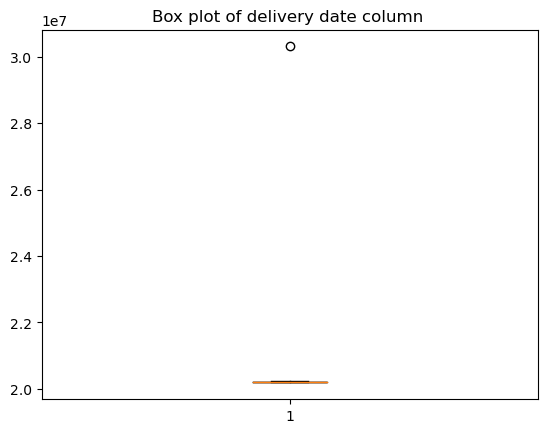

In [35]:
# delivery date
plt.boxplot(data['delivery date'])                             #outlier detection using boxplot
plt.title('Box plot of delivery date column ')

In [36]:
Q1=np.percentile(data['delivery date'],25,interpolation='midpoint')
Q2=np.percentile(data['delivery date'],50,interpolation='midpoint')
Q3=np.percentile(data['delivery date'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

20201101.0
20210101.0
20210401.0
20187151.0
20224351.0


In [37]:
outlier = []
for x in data['delivery date']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
        
print(outlier)

[30310101.0]


In [38]:
print(data[data['delivery date']>up_lim].index)

Int64Index([58], dtype='int64')


In [39]:
data.drop([58],inplace=True)

Text(0.5, 1.0, 'Box plot of application date column ')

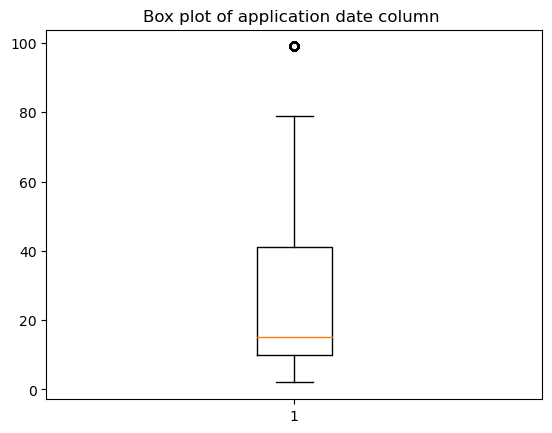

In [40]:
# application
plt.boxplot(data['application'])                             #outlier detection using boxplot
plt.title('Box plot of application date column ')

In [41]:
Q1=np.percentile(data['application'],25,interpolation='midpoint')
Q2=np.percentile(data['application'],50,interpolation='midpoint')
Q3=np.percentile(data['application'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

10.0
15.0
41.0


In [42]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-36.5
87.5


In [43]:
outlier = []
for x in data['application']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
        
len(outlier)

146

In [44]:
outlier

[99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,

In [45]:
data[data['application']>90].index        #These values can't be considered as outliers , so we are not removing them

Int64Index([  3309,   3311,   3313,   3315,   8104,   8108,   8112,  26683,
             29497,  29501,
            ...
            169497, 169501, 169505, 169509, 176133, 176137, 179527, 179531,
            179535, 179539],
           dtype='int64', length=146)

Text(0.5, 1.0, 'Box plot of thickness date column ')

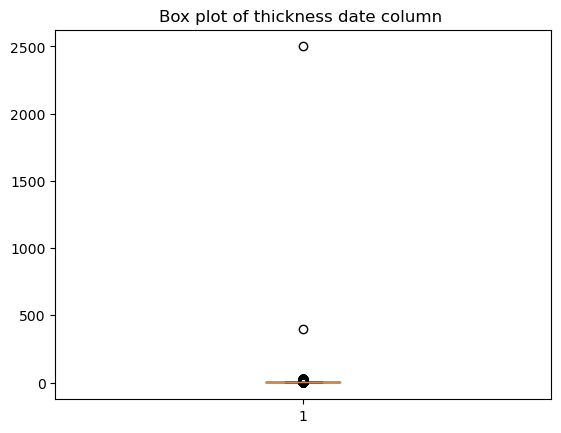

In [46]:
# thickness
plt.boxplot(data['thickness'])                             #outlier detection using boxplot
plt.title('Box plot of thickness date column ')

In [47]:
Q1=np.percentile(data['thickness'],25,interpolation='midpoint')
Q2=np.percentile(data['thickness'],50,interpolation='midpoint')
Q3=np.percentile(data['thickness'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.7
1.5
3.0


In [48]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-2.75
6.449999999999999


In [49]:
outlier = []
for x in data['thickness']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
        
len(outlier)

13959

In [50]:
print(data[data['thickness']>100].index)

Int64Index([41, 45001], dtype='int64')


In [51]:
data.drop([41, 45001],inplace=True)

Text(0.5, 1.0, 'Box plot of width column ')

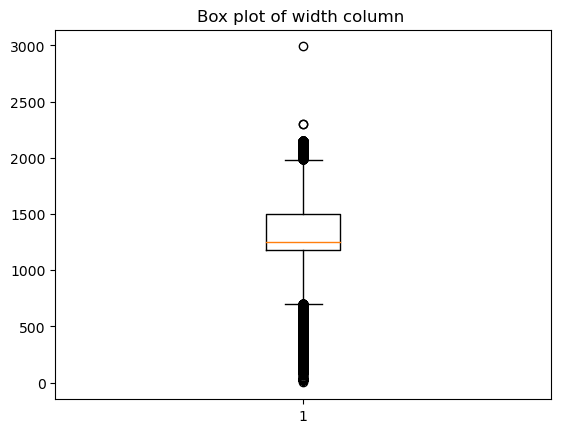

In [52]:
# width
plt.boxplot(data['width'])                             #outlier detection using boxplot
plt.title('Box plot of width column ')

In [53]:
Q1=np.percentile(data['width'],25,interpolation='midpoint')
Q2=np.percentile(data['width'],50,interpolation='midpoint')
Q3=np.percentile(data['width'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

1180.0
1250.0
1500.0
700.0
1980.0


In [54]:
outlier = []
for x in data['width']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
        
len(outlier)

10948

In [55]:
print(data[data['width']>2250].index)

Int64Index([42120, 58144, 67018], dtype='int64')


In [56]:
data.drop([42120, 58144, 67018],inplace=True)

Text(0.5, 1.0, 'Box plot of quantity tons date column ')

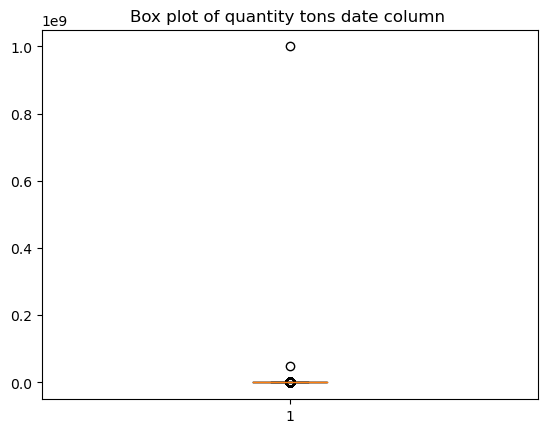

In [57]:
# quantity tons
plt.boxplot(data['quantity tons'])                             #outlier detection using boxplot
plt.title('Box plot of quantity tons date column ')

In [58]:
Q1=np.percentile(data['quantity tons'],25,interpolation='midpoint')
Q2=np.percentile(data['quantity tons'],50,interpolation='midpoint')
Q3=np.percentile(data['quantity tons'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

10.96990299499664
30.364111007180068
67.16145438943727
-73.3174240966643
151.4487814810982


In [59]:
outlier = []
for x in data['quantity tons']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
        
len(outlier)

20954

In [60]:
print(data[data['quantity tons']>19000].index)

Int64Index([  2725,   2758,   2834,  71486,  71498,  85526, 100248, 100256,
            100260, 173022, 173211, 175802, 176479],
           dtype='int64')


In [61]:
data.drop([2725,   2758,   2834,  71486,  71498,  85526, 100248, 100256,
            100260, 173022, 173211, 175802, 176479],inplace=True)

Text(0.5, 1.0, 'Box plot of selling_price date column ')

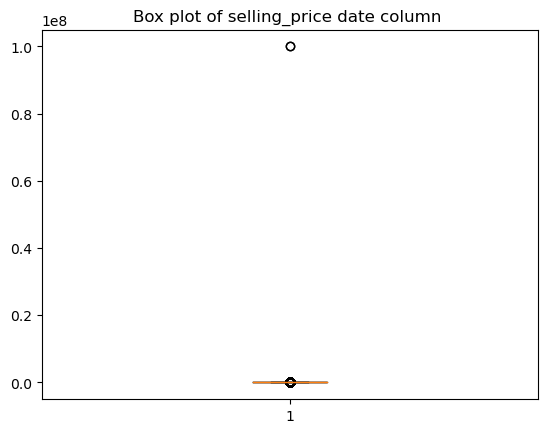

In [62]:
# selling_price
plt.boxplot(data['selling_price'])                             #outlier detection using boxplot
plt.title('Box plot of selling_price date column ')

In [63]:
Q1=np.percentile(data['selling_price'],25,interpolation='midpoint')
Q2=np.percentile(data['selling_price'],50,interpolation='midpoint')
Q3=np.percentile(data['selling_price'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

669.0
812.0
953.0
243.0
1379.0


In [64]:
outlier = []
for x in data['selling_price']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
        
len(outlier)

4876

In [65]:
print(data[data['selling_price']>5000].index)

Int64Index([10228, 36192, 76871, 113918, 116445, 123570, 124547, 141122,
            153215, 159869],
           dtype='int64')


In [66]:
data.drop([10228, 36192, 76871, 113918, 116445, 123570, 124547, 141122,
            153215, 159869],inplace=True)

In [67]:
data.nunique()

item_date           251
quantity tons    181642
customer           1169
country              17
status                9
item type             7
application          30
thickness           592
width              1384
product_ref          33
delivery date        27
selling_price      9785
dtype: int64

### Handling duplicate values

In [68]:
#Check if any duplicate rows in dataset
data.duplicated().sum()

0

- no duplicated values found

# Exploratory data analysis (EDA)

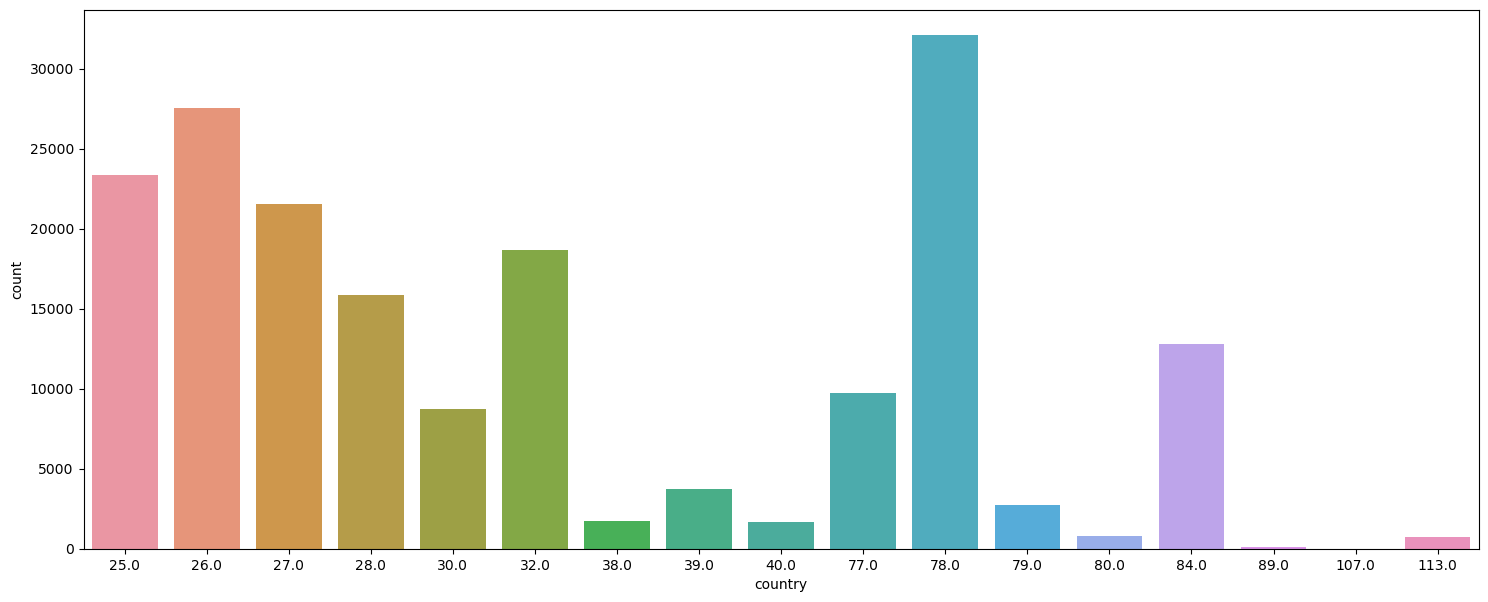

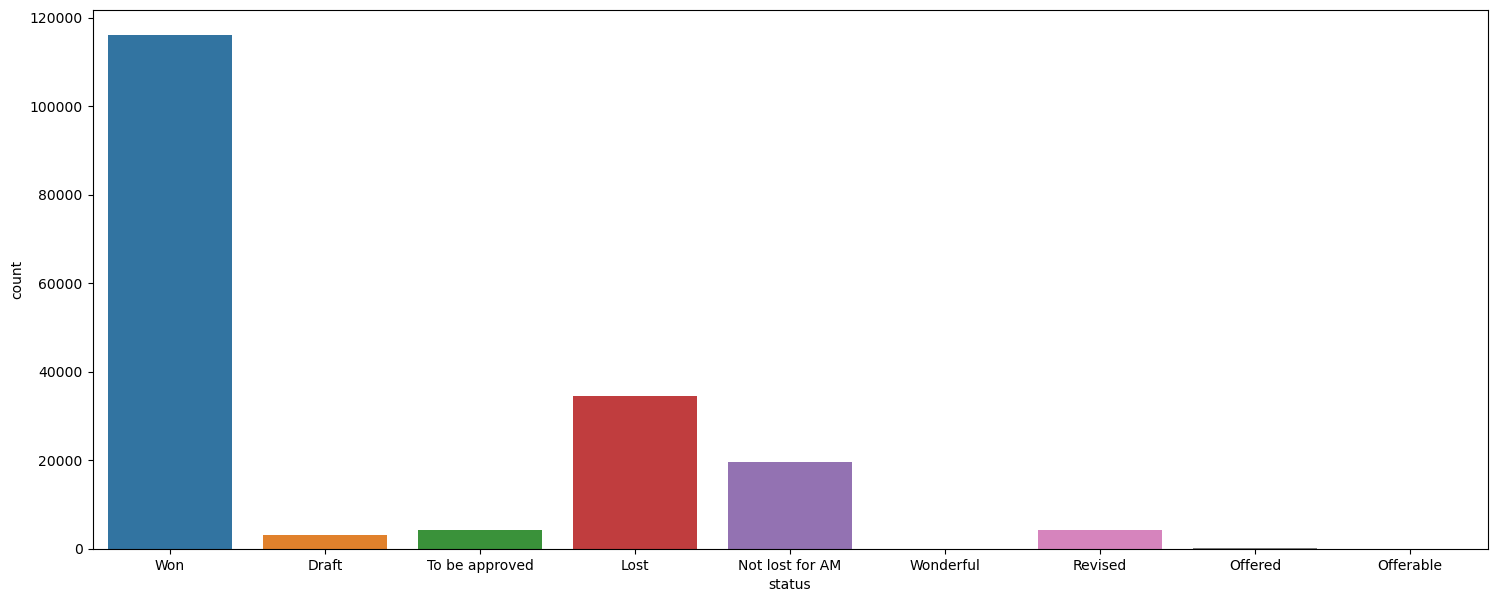

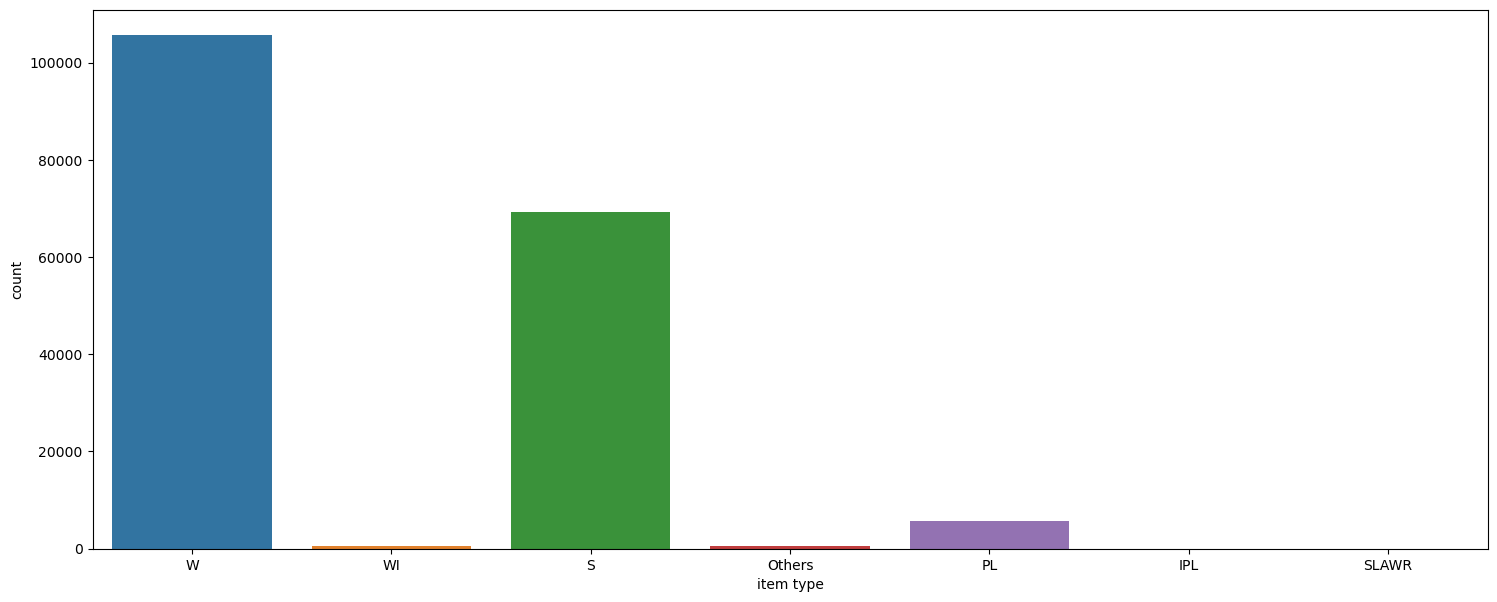

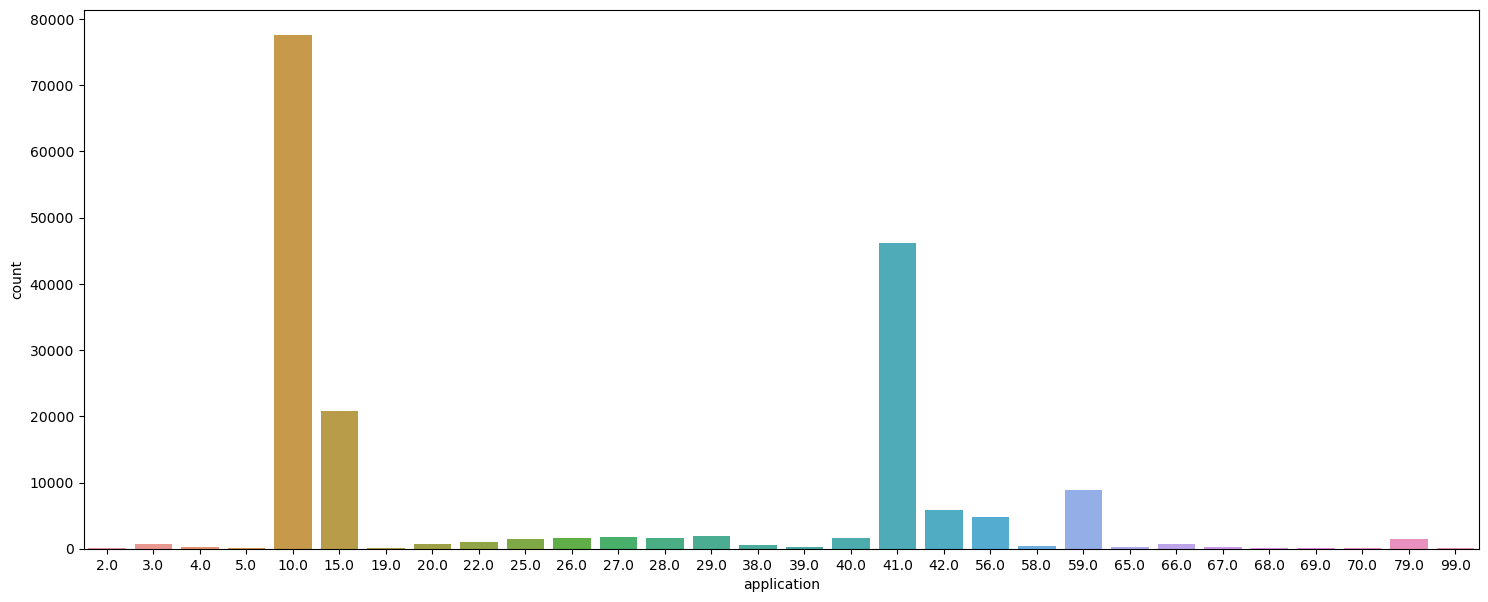

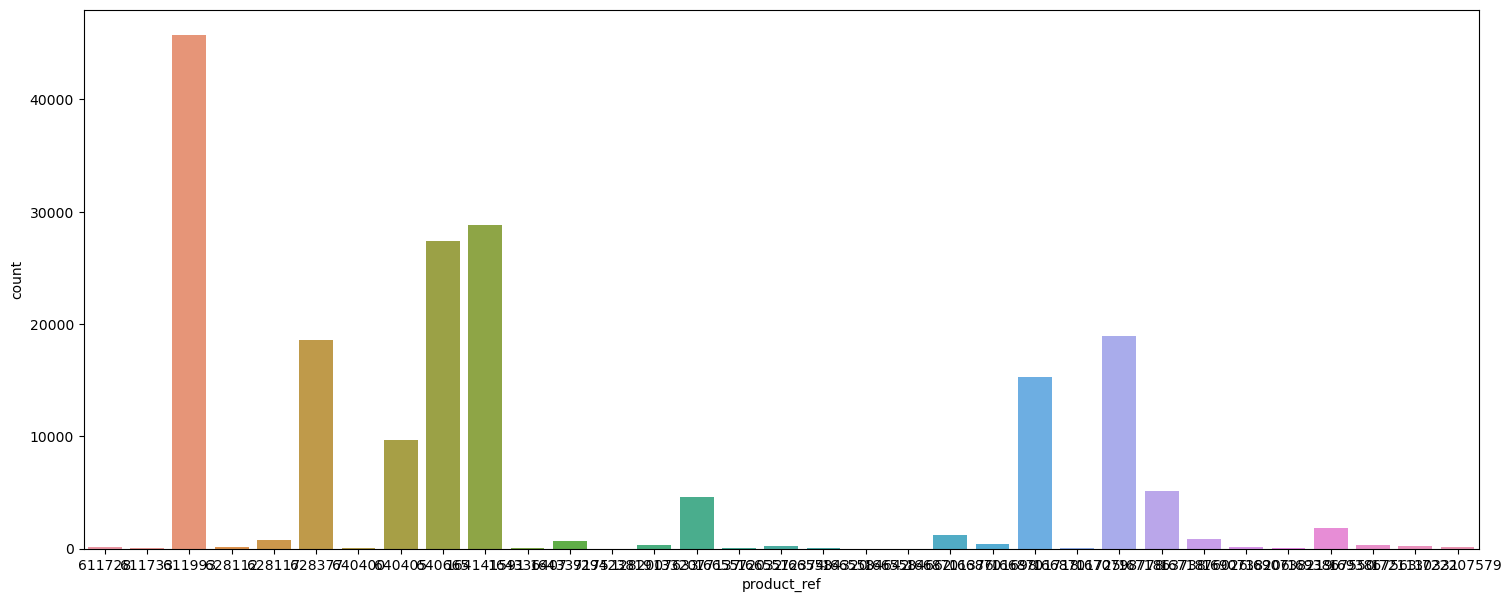

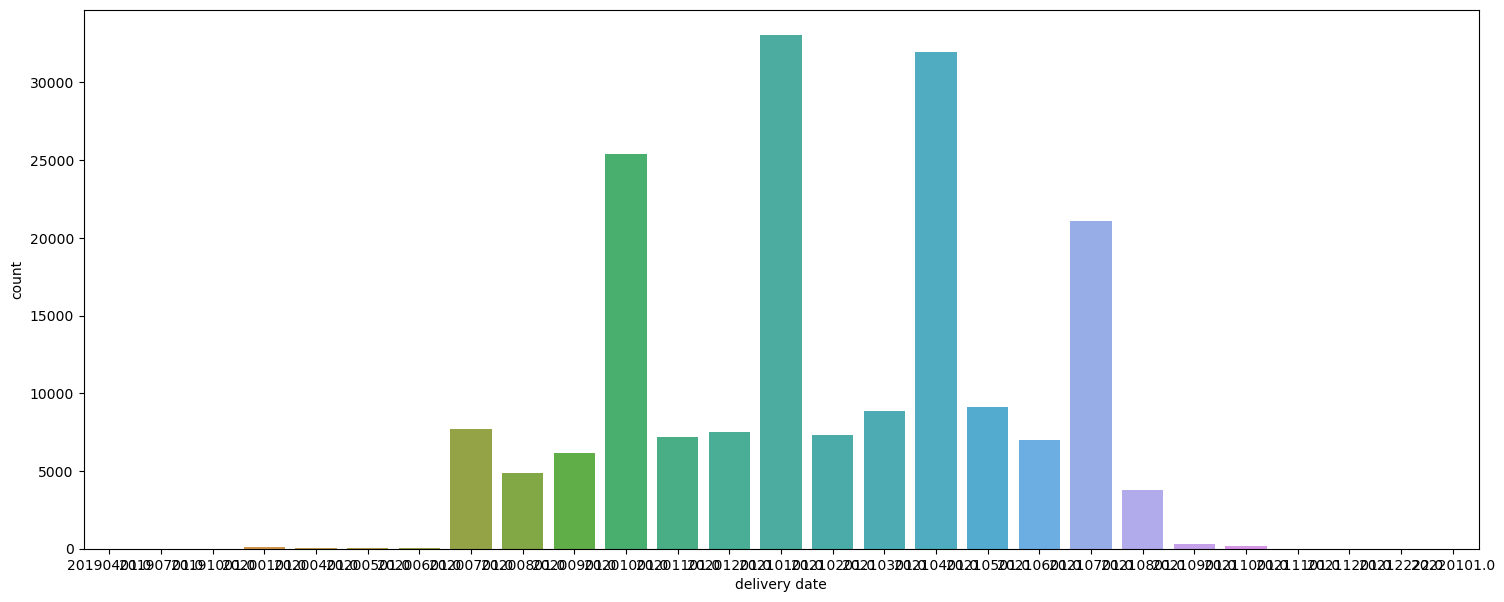

In [69]:
#CountPlot for various columns
for i in data:
    if(data[i].nunique()<35):
        plt.figure(figsize=(18, 7))
        sns.countplot(x=data[i])
        plt.show()

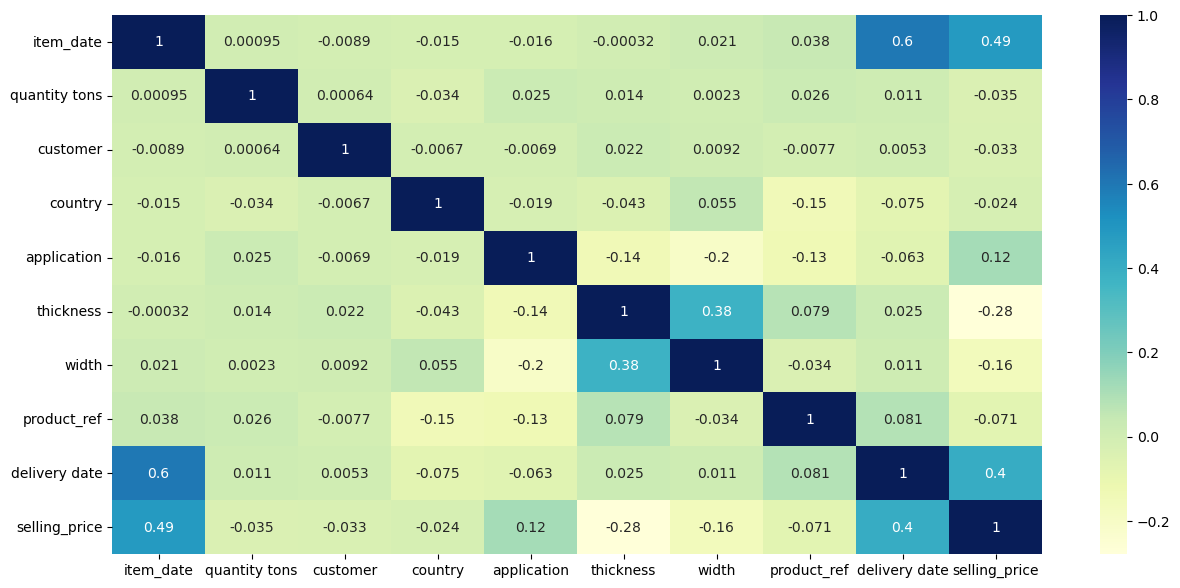

In [70]:
#CORRELATION MATRIX
plt.figure(figsize=(15, 7))
corr=data.corr()
sns.heatmap(corr,cmap="YlGnBu",annot=True)
plt.show()

- there is no highly positively or negatively correlated features.
- item_date and delivery_date are somewhat positively correlated.

In [71]:
data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


## Feature Engineering

In [72]:
# convert the item_date column to a string data type
data['item_date'] = data['item_date'].astype(str)

# extract the year and month from the item_date column and create new columns
data['item_year'] = data['item_date'].str[:4]
data['item_month'] = data['item_date'].str[4:6]

# convert the year and month columns to integer data type
data['item_year'] = data['item_year'].astype(int)
data['item_month'] = data['item_month'].astype(int)


In [73]:
data[data['delivery date']==20212222].index  #month as 22 is invalid, so we drop that row

Int64Index([105421], dtype='int64')

In [74]:
data.drop([105421],inplace=True)

In [75]:
# Converting the item_date column to datetime format
data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y%m%d')

# Extracting the year and month features from the item_date column
data['delivery_year'] = data['delivery date'].dt.year
data['delivery_month'] = data['delivery date'].dt.month

In [76]:
data.dtypes

item_date                 object
quantity tons            float64
customer                 float64
country                  float64
status                    object
item type                 object
application              float64
thickness                float64
width                    float64
product_ref                int64
delivery date     datetime64[ns]
selling_price            float64
item_year                  int32
item_month                 int32
delivery_year              int64
delivery_month             int64
dtype: object

In [77]:
data.nunique()

item_date            251
quantity tons     181641
customer            1169
country               17
status                 9
item type              7
application           30
thickness            592
width               1384
product_ref           33
delivery date         26
selling_price       9785
item_year              3
item_month            11
delivery_year          4
delivery_month        12
dtype: int64

In [78]:
data['item_month'].value_counts()

3     29584
1     22738
11    21311
10    20878
12    19912
7     19226
9     19042
2     17903
8     10389
4       657
19        1
Name: item_month, dtype: int64

In [79]:
data[data['item_month']==19].index       # there is no 19th month, so we drop that row

Int64Index([105485], dtype='int64')

In [80]:
data.drop([105485],inplace=True)

In [81]:
data['item_month'].value_counts()

3     29584
1     22738
11    21311
10    20878
12    19912
7     19226
9     19042
2     17903
8     10389
4       657
Name: item_month, dtype: int64

In [82]:
data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_year,item_month,delivery_year,delivery_month
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,2021,4,2021,7
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,2021,4,2021,4
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,2021,4,2021,1
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,2021,4,2021,1
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,2021,4,2021,3


In [83]:
data.drop(['item_date','delivery date'],inplace=True,axis=1) 

## Encoding features

In [84]:
#Label Encoding
le = LabelEncoder()
data['customer'] = le.fit_transform(data['customer'])
data['country'] = le.fit_transform(data['country'])
data['status'] = le.fit_transform(data['status'])
data['item type'] = le.fit_transform(data['item type'])
data['application'] = le.fit_transform(data['application'])
data['product_ref'] = le.fit_transform(data['product_ref'])

<AxesSubplot:>

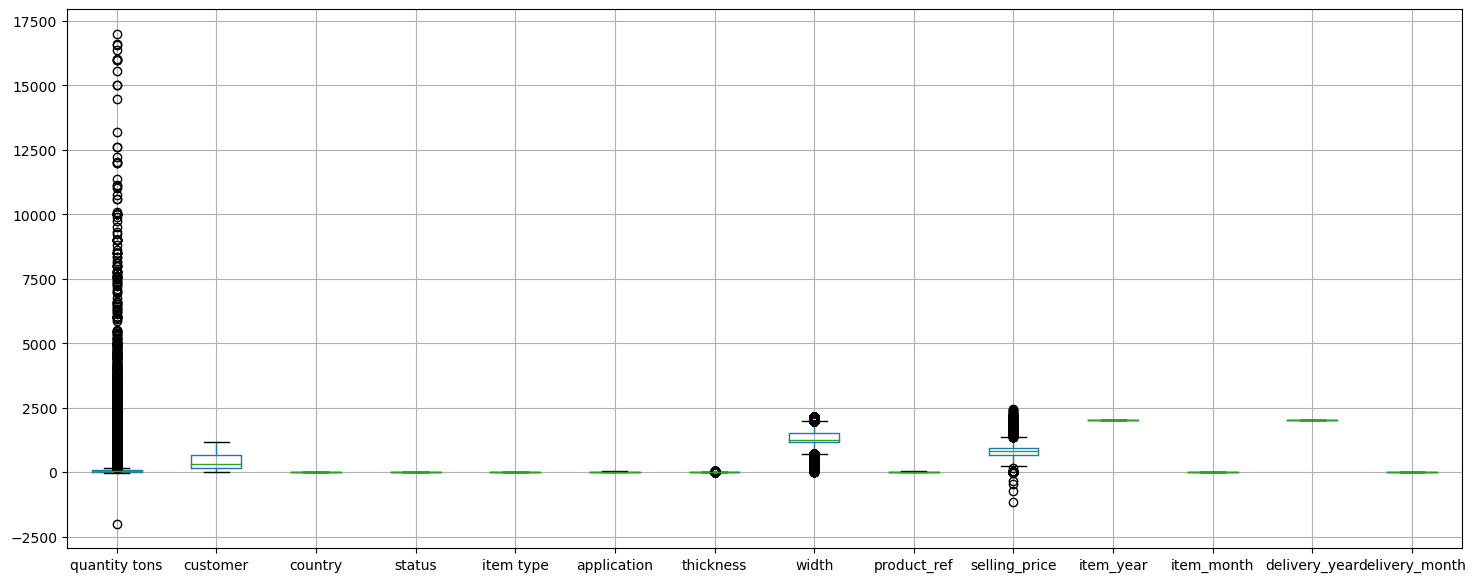

In [85]:
data.boxplot(figsize=(18, 7))

In [86]:
data.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_year,item_month,delivery_year,delivery_month
0,54.151139,51,3,7,5,4,2.00,1500.0,24,854.00,2021,4,2021,7
1,768.024839,288,0,7,5,17,0.80,1210.0,22,1047.00,2021,4,2021,4
2,386.127949,39,4,7,6,12,0.38,952.0,5,644.33,2021,4,2021,1
3,202.411065,955,5,7,3,21,2.30,1317.0,22,768.00,2021,4,2021,1
4,785.526262,397,3,7,5,4,4.00,2000.0,8,577.00,2021,4,2021,3


In [89]:
data.shape

(181640, 14)

In [90]:
data.nunique()

quantity tons     181640
customer            1169
country               17
status                 9
item type              7
application           30
thickness            592
width               1384
product_ref           33
selling_price       9785
item_year              2
item_month            10
delivery_year          4
delivery_month        12
dtype: int64

In [91]:
data.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'item_year', 'item_month', 'delivery_year', 'delivery_month'],
      dtype='object')

### Histplot

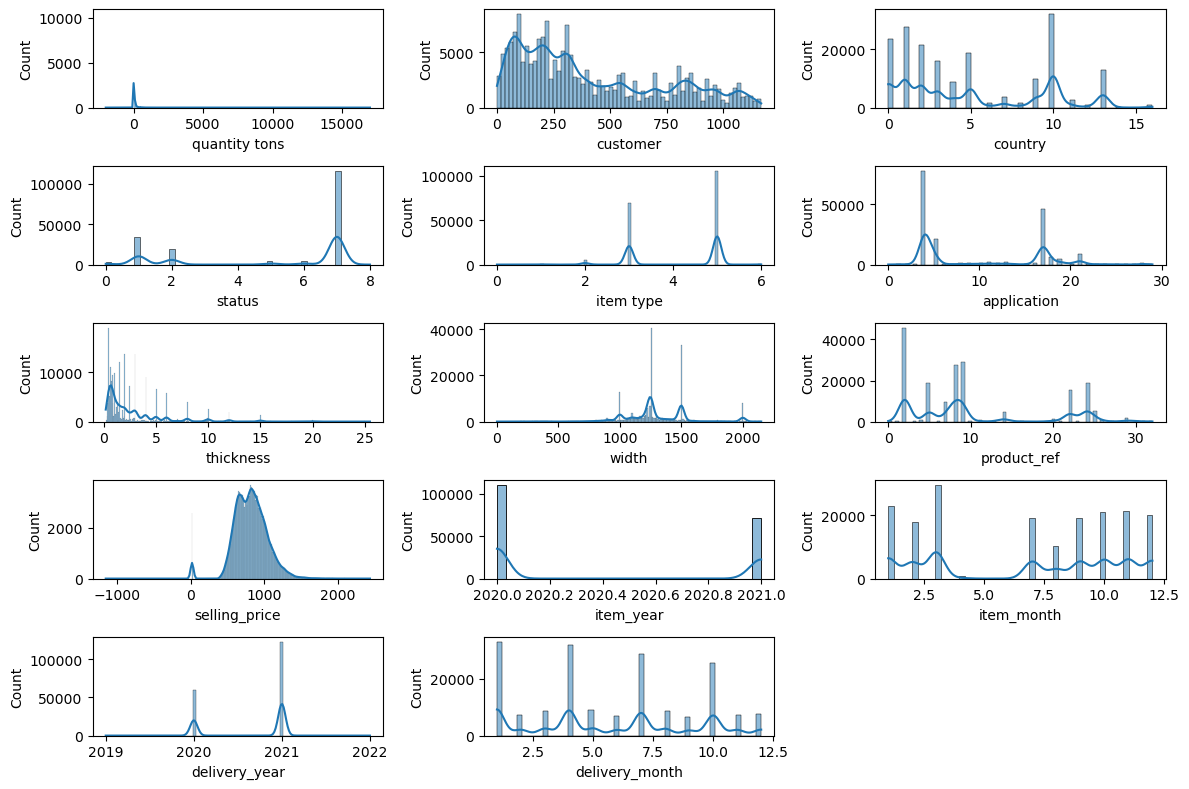

In [92]:
c=data[['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'item_year', 'item_month', 'delivery_year', 'delivery_month']]
plt.figure(figsize=(12,8))
for i, j in enumerate(c):
    plt.subplot(5,3, i+1)
    sns.histplot( data[j], kde = True)
plt.tight_layout()    

### Countplot

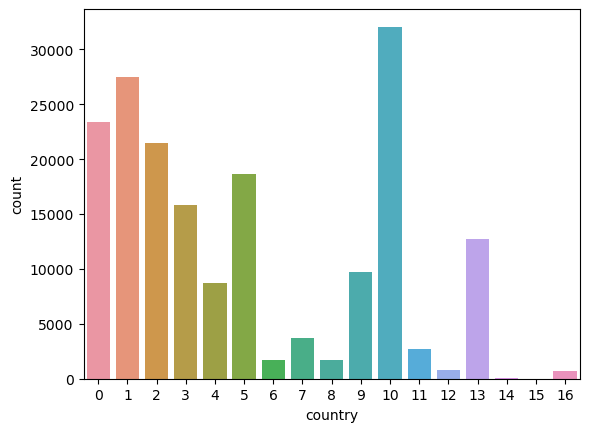

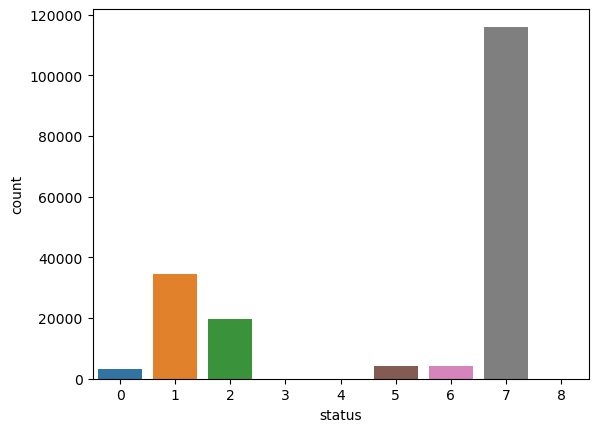

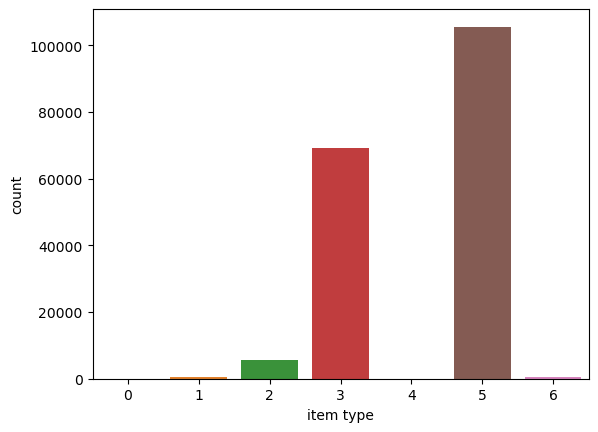

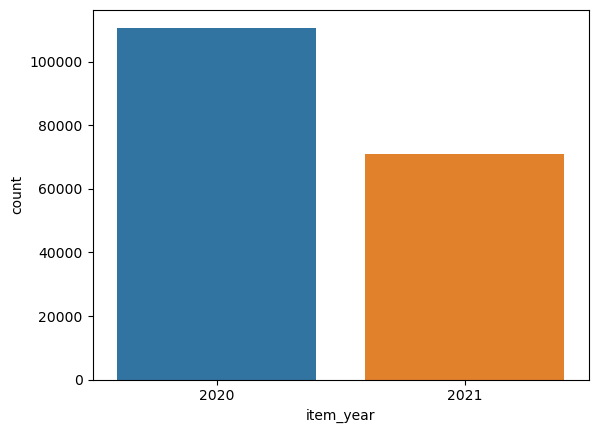

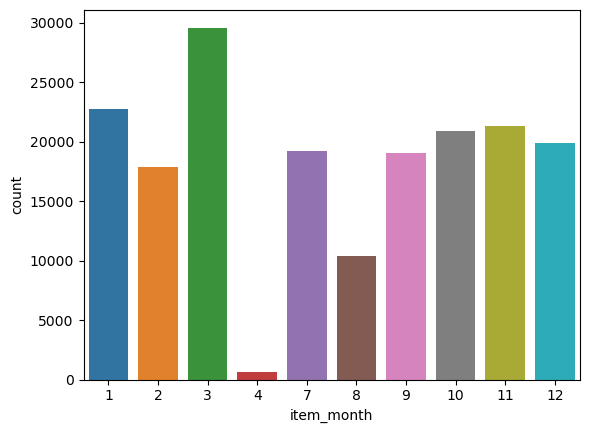

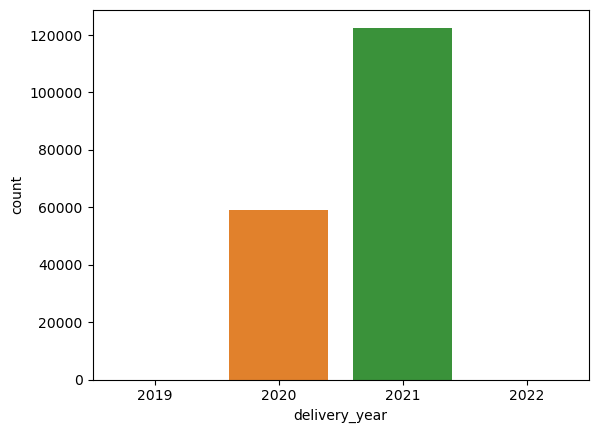

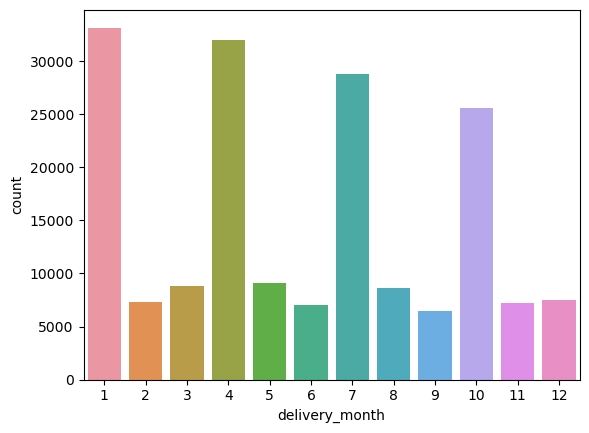

In [93]:
for i in c:
    if (data[i].nunique())<=25:
        sns.countplot(x=data[i])
        plt.show()

### Heatmap

<AxesSubplot:>

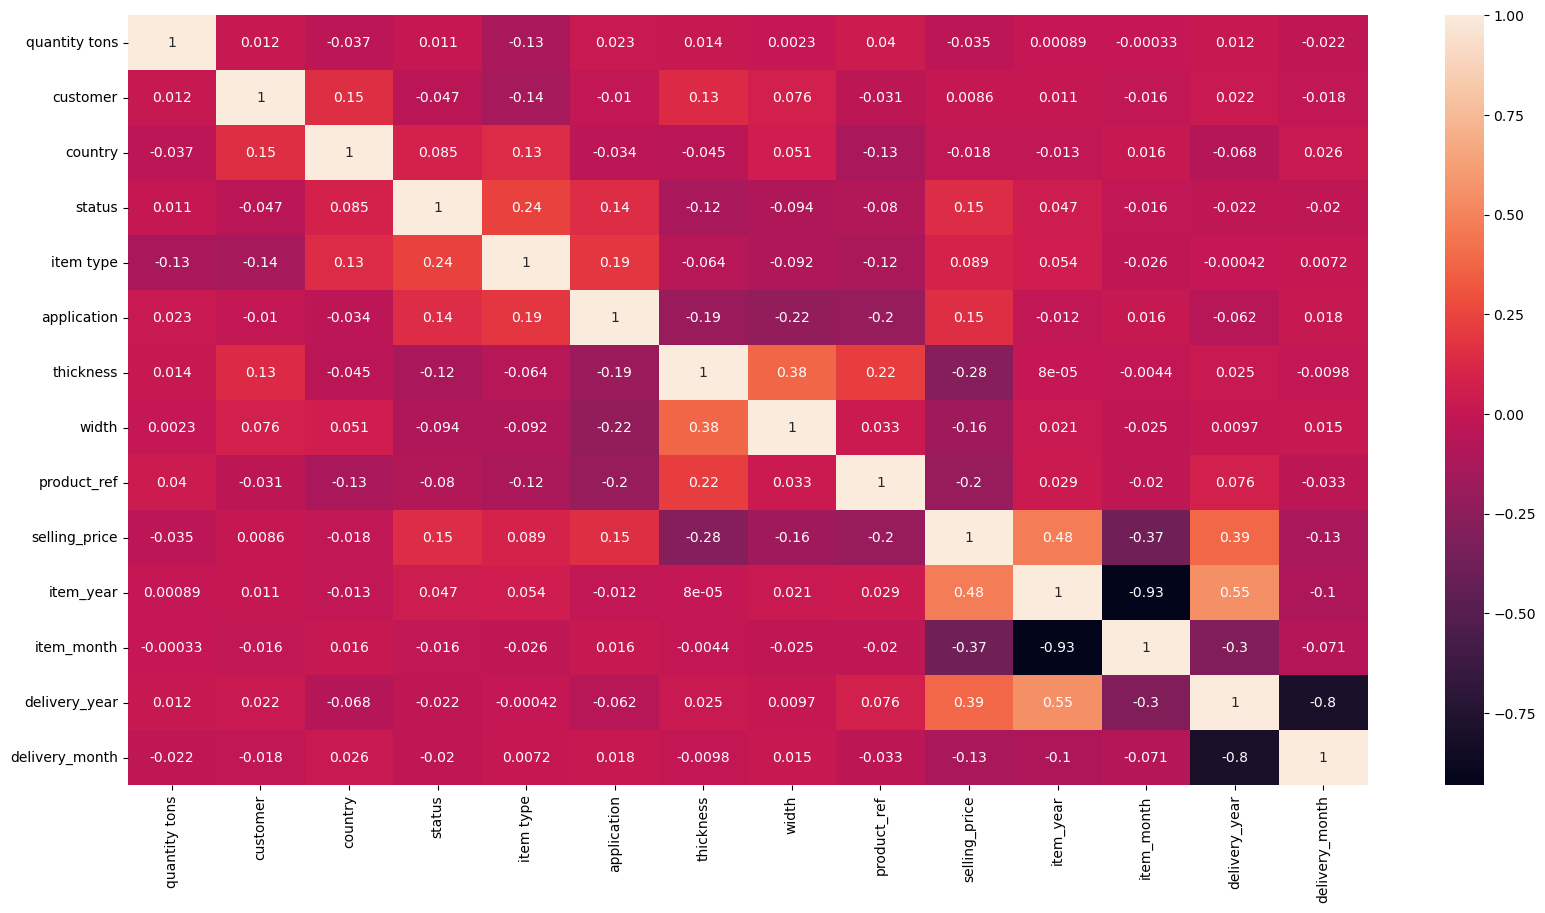

In [94]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True)

- features like 'status', 'application', 'thickness', 'width', 'product_ref', 'item_year',
  'item_month', 'delivery_year', and 'delivery_month' are more related to our target variable selling price. 
- A line plot is plotted using these features.

### Lineplot

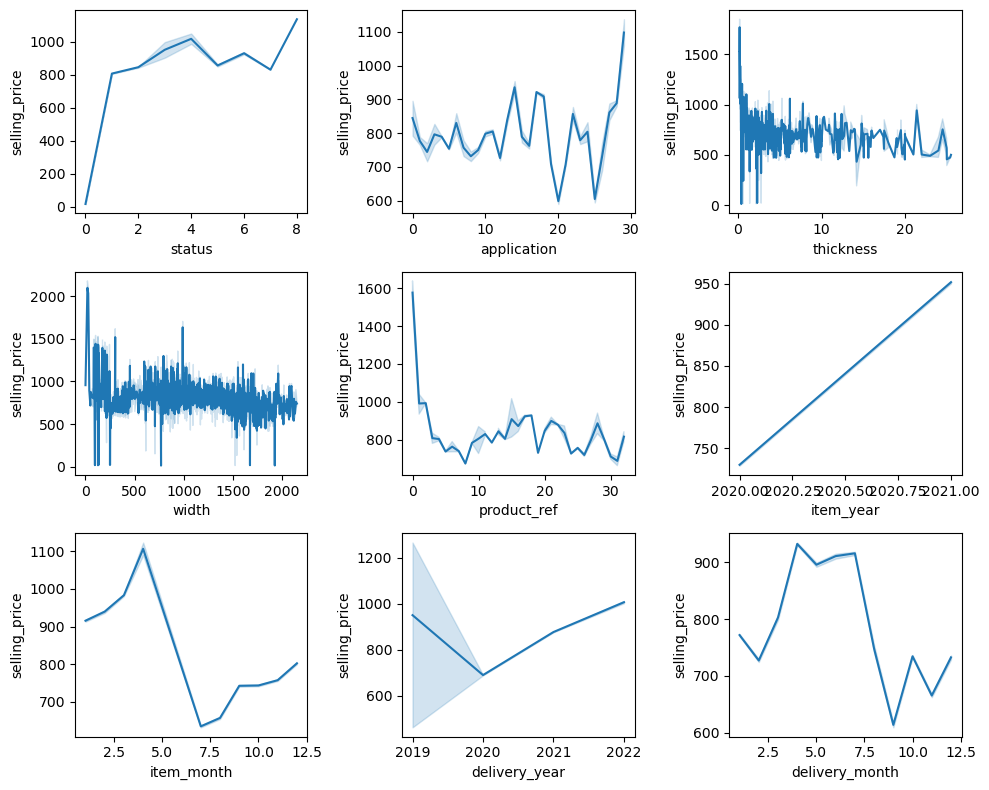

In [95]:
a=data[['status','application', 'thickness', 'width', 'product_ref', 
       'item_year', 'item_month', 'delivery_year', 'delivery_month']]
plt.figure(figsize=(10,8))
for i, j in enumerate(a):
    plt.subplot(3,3, i+1)
    sns.lineplot(y=data['selling_price'],x=data[j])
plt.tight_layout()

- We can find that item year and selling price are directly proportional.

## Splitting independent and dependent features

In [96]:
x=data.drop('selling_price',axis=1)
y=data['selling_price']

# Perform 90 : 10 Train-Test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1, random_state=123)
# Observe the shapes
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((163476, 13), (163476,), (18164, 13), (18164,))

## Normalization (min-max Scaling)

In [97]:
# Create an instance of the class
scaler = MinMaxScaler()
# Use the fit transform method to perform the transformation on train data
x_train.loc[:,:] = scaler.fit_transform(x_train)
## Use the fit transform method to perform the transformation on train data
x_test.loc[:,:] = scaler.transform(x_test)

In [98]:
x_train.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,item_year,item_month,delivery_year,delivery_month
60909,0.106833,0.436644,0.8125,0.875,0.833333,0.137931,0.052133,0.581201,0.28125,1.0,0.000000,0.666667,0.272727
8095,0.105664,0.704623,0.5625,0.875,0.833333,0.137931,0.190363,0.697534,0.21875,1.0,0.181818,0.666667,0.363636
5357,0.106458,0.357021,0.1250,0.875,0.500000,0.137931,0.040284,0.635179,0.15625,1.0,0.181818,0.666667,0.636364
86044,0.106542,0.267123,0.3125,0.125,0.833333,0.137931,0.111374,0.920893,0.75000,0.0,1.000000,0.666667,0.272727
41813,0.116031,0.814212,0.0625,0.125,0.500000,0.137931,0.091627,0.348534,0.06250,1.0,0.090909,0.666667,0.545455


In [99]:
x_test.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,item_year,item_month,delivery_year,delivery_month
178917,0.106479,0.538527,0.0625,0.875,0.833333,0.655172,0.091627,0.418334,0.75000,0.0,0.545455,0.333333,0.545455
165198,0.108078,0.043664,0.1875,0.875,0.833333,0.137931,0.470774,0.697534,0.25000,0.0,0.545455,0.333333,0.818182
117416,0.106008,0.267123,0.3125,0.250,0.833333,0.137931,0.052133,0.581201,0.15625,0.0,0.818182,0.666667,0.000000
92611,0.109618,0.445205,0.6250,0.875,0.500000,0.137931,0.052133,0.581201,0.28125,0.0,0.909091,0.666667,0.000000
129827,0.114795,0.007705,0.1250,0.250,0.500000,0.586207,0.020537,0.557934,0.06250,0.0,0.818182,0.666667,0.000000


# Model Building and Evaluation

## 1. LinearRegression

In [100]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred

array([628.31370879, 515.2294961 , 755.939514  , ..., 639.07520309,
       854.68846228, 716.88313223])

In [101]:
#Model Evaluation

print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred))))
print("The R-squred value is: {} ".format(r2_score(y_test, y_pred)*100))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 116.95124100955643
Mean Squared Error (MSE): 31214.368485024745
Root Mean Squared Error (RMSE): 176.6758854089169
The R-squred value is: 40.0749351561416 


## 2. DecisionTreeRegressor

In [102]:
tree = DecisionTreeRegressor(random_state=45,max_depth=15)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

In [103]:
#Model Evaluation

print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred))))
print("The R-squred value is: {} ".format(r2_score(y_test, y_pred)*100))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 37.197605391576644
Mean Squared Error (MSE): 3722.409154064781
Root Mean Squared Error (RMSE): 61.01154934981393
The R-squred value is: 92.85375226989709 


## 3. RandomForestRegressor

In [104]:
forest = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=300)
# Train Model
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

In [105]:
#Model Evaluation

print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred))))
print("The R-squred value is: {} ".format(r2_score(y_test, y_pred)*100))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 31.975822778933075
Mean Squared Error (MSE): 2732.9361750421135
Root Mean Squared Error (RMSE): 52.27749205004113
The R-squred value is: 94.75333362640045 


## 4. LassoCV

In [106]:
lasso = LassoCV()
# Train Model
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

In [107]:
#Model Evaluation

print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred))))
print("The R-squred value is: {} ".format(r2_score(y_test, y_pred)*100))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 116.93691995085852
Mean Squared Error (MSE): 31218.674244194408
Root Mean Squared Error (RMSE): 176.68807046372544
The R-squred value is: 40.0666689982801 


## 5. XG Boost Regressor

In [108]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)

In [109]:
#Model Evaluation

print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred))))
print("The R-squred value is: {} ".format(r2_score(y_test, y_pred)*100))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 35.80369161203238
Mean Squared Error (MSE): 3082.3570754001103
Root Mean Squared Error (RMSE): 55.51897941605294
The R-squred value is: 94.08251851374494 


## 6. Gradient Boost Regressor

In [110]:
gbt = GradientBoostingRegressor()
gbt.fit(x_train, y_train)
y_pred = gbt.predict(x_test)

In [111]:
#Model Evaluation

print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred))))
print("The R-squred value is: {} ".format(r2_score(y_test, y_pred)*100))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 52.73415518334025
Mean Squared Error (MSE): 5881.323529395531
Root Mean Squared Error (RMSE): 76.68978764734932
The R-squred value is: 88.70908780243875 


### Comparision of r2 Score (Coefficient of Determination)

<AxesSubplot:xlabel='models', ylabel='r2_score'>

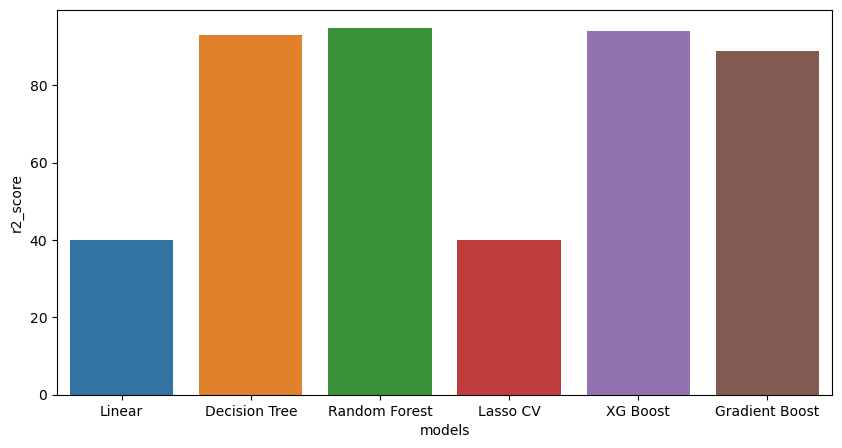

In [112]:
models=["Linear","Decision Tree","Random Forest","Lasso CV",'XG Boost','Gradient Boost']
r2_score = [40.07,92.85,94.75,40.06,94.08,88.70]
df=pd.DataFrame({'models':models,"r2_score":r2_score})
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="models",y="r2_score")

# HYPERPARAMETER TUNING

## 1. Random Search CV

In [121]:
# Number of trees in random forest
n_estimators = [10,20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]


param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [10, 20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [122]:
rf_grid = RandomizedSearchCV(estimator = forest, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)
rf_grid.fit(x_train,y_train)

print(rf_grid.best_params_)
print(rf_grid.best_score_)

y_pred=rf_grid.predict(x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_samples': 1.0, 'max_features': 1.0, 'max_depth': None, 'bootstrap': True}
0.9498228416715031


In [123]:
r2 = r2_score(y_test, y_pred)
print('R2: ', r2)

R2:  0.9503678488456409


## 2. GridSearchCV

In [124]:
max_features_range = np.arange(7,9,1)
n_estimators_range = np.arange(600,1100,200)
max_depth_range=np.arange(20,40,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range,max_depth=max_depth_range)
rf_grid = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5)

In [126]:
# rf_grid.fit(x_train, y_train)
# print(rf_grid.best_params_)
# print(rf_grid.best_score_)

# y_pred=rf_grid.predict(x_test)
# print(r2_score(y_test,y_pred))